In [23]:
#Keras helpfully has many built in RNN classifiers; here, we'll focus on the basic implementation of
#a simple RNN, which is the same as what we have covered in lecture.
#In the case of the simple RNN, each step of the model is fully connected, and the
#output from the previous step is fed into the next step.
#Keras has a fairly helpful guide on RNNs you can look at here:
#https://keras.io/guides/working_with_rnns/

#In this analysis, we're going to start analyzing video for the first time.
#The full dataset we'll be using is located at:
#https://serre-lab.clps.brown.edu/resource/hmdb-a-large-human-motion-database/#overview
#But, for this example, we'll just be using a subset of classes:
#Cartwheel, Catch, Drink, Hub, Kick, Kiss, Punch and Sit
#You will find these movies in the "HMDB" folder.

#First, we're going to convert our AVI files to frames.  We'll use 10 frames per video for this example.
#The package we use to open the video files is called OpenCV, which is a popular video manipulation package.
#You will install it with a pip install opencv-python.  We're also going to load in a video display.
import cv2
import math

#==========Visualize in Jupyter: Bonus
#Note: this may or may not work, depending on your OS.
#If it doesn't work, you're stuck opening the videos in your
#media player of choice!  I use VLC.
#from IPython.display import Video
#Video("./HMDB/catch/Frisbee_catch_f_cm_np1_ri_med_0.avi")
#==========

#First, we'll extract frames from one video; in the next snippet we'll actually
#do this for all cases.  Note we'll only be grabbing 10 frames per video for
#the sake of example, equally spaced throughout each clip.

frames = []
video = cv2.VideoCapture("./HMDB/sit/TrumanShow_sit_f_nm_np1_le_med_37.avi")
videoLen = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print("I have " + str(videoLen) + " frames.")

#Calculate the gap between frames if we want 10 equally spaced frames.
frameGap = math.floor(videoLen/10)
print("I want to capture every frame starting with 0, incrementing by " + str(frameGap) + ".")

allFrames = []

for frame in range(videoLen):
    s, frameData = video.read()
    if frame % int(frameGap) == 0:
        print("I will grab frame " + str(frame))    
        allFrames.append(cv2.cvtColor(frameData, cv2.COLOR_BGR2RGB))

#We now have an array for each frame, made up of three layers (RGB) for each video.
print(allFrames[0])

        

I have 50 frames.
I want to capture every frame starting with 0, incrementing by 5.
I will grab frame 0
I will grab frame 5
I will grab frame 10
I will grab frame 15
I will grab frame 20
I will grab frame 25
I will grab frame 30
I will grab frame 35
I will grab frame 40
I will grab frame 45
[[[ 39  40  30]
  [ 32  33  23]
  [ 27  28  18]
  ...
  [123 165 224]
  [123 170 229]
  [119 166 225]]

 [[ 37  38  28]
  [ 32  33  23]
  [ 27  28  18]
  ...
  [124 166 225]
  [125 172 231]
  [125 172 231]]

 [[ 31  32  22]
  [ 30  31  21]
  [ 30  31  21]
  ...
  [133 173 221]
  [128 170 229]
  [126 168 227]]

 ...

 [[109 120 109]
  [109 120 109]
  [108 119 108]
  ...
  [ 61  78  84]
  [ 61  78  82]
  [ 60  77  81]]

 [[107 118 103]
  [108 119 104]
  [108 119 108]
  ...
  [ 60  76  87]
  [ 61  75  85]
  [ 61  75  85]]

 [[105 116 101]
  [107 118 103]
  [108 119 108]
  ...
  [ 59  75  86]
  [ 60  74  84]
  [ 61  75  85]]]


In [55]:
#Now, we're going to do the above procedure, but apply it to every movie
#we have, and save the arrays in a new folder for each movie.

#First, let's build a short helper function:
import pathlib

def transformVideo(path, outFolder):
    #Make the folder if it doesn't exist already
    pathlib.Path(outFolder).mkdir(parents=True, exist_ok=True)
    frames = []
    video = cv2.VideoCapture(path)
    videoLen = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frameGap = math.floor(videoLen/10)
    
    for frame in range(videoLen):
        s, frameData = video.read()
        if frame % int(frameGap) == 0:
            try:
                #Note we're not handling encoding that may be specific to some videos.
                #This will result in a number of failures, but are outside the scope of this lesson.
                #Broadly, it is also rare it's an issue in video processing - i.e., normally you're taking in video
                #from a single source (a camera), not dozens of random movie clips.  So, for now, we'll just ignore the failed cases.
                #To learn more: https://github.com/ageitgey/face_recognition/issues/933
                cv2.imwrite(outFolder + str(frame) + ".jpg", cv2.cvtColor(frameData, cv2.COLOR_BGR2RGB))
            except:
                print("Failed to convert " + path)
    
transformVideo("./HMDB/sit/TrumanShow_sit_f_nm_np1_le_med_37.avi", "./HMDB_frames/sit/1/")

In [56]:
#And, now, let's apply our transform to all of our videos...
import pathlib
import os

for sD, directory, files in os.walk("./HMDB"):
    pathlist = pathlib.Path(sD).glob('*.avi')
    
    moveType = sD.split("/")[-1]
    print("Processing videos from " + str(moveType))
    i = 0
    for path in pathlist:
        print(str(i))
        transformVideo(str(path), "./HMDB_frames/" + moveType + "/" + str(i) + "/")
        i = i + 1

np1_ba_bad_1.avi
66
Failed to convert HMDB/catch/Florian_Fromlowitz_beim_Training_der_U_21_Nationalmannschaft_catch_u_cm_np1_le_med_5.avi
67
Failed to convert HMDB/catch/Goalkeeper_Training_Day_#_7_catch_f_cm_np1_ri_med_0.avi
68
Failed to convert HMDB/catch/Goalkeeper_Training_Day_#_2_catch_f_cm_np1_ba_bad_5.avi
69
Failed to convert HMDB/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_le_med_2.avi
70
Failed to convert HMDB/catch/Finding_Forrester_3_catch_f_nm_np2_ba_med_7.avi
71
Failed to convert HMDB/catch/Goalkeeper_Training_Day_#_7_catch_f_cm_np1_le_bad_3.avi
72
73
Failed to convert HMDB/catch/Florian_Fromlowitz_beim_Training_der_U_21_Nationalmannschaft_catch_u_cm_np1_le_med_1.avi
74
75
Failed to convert HMDB/catch/Florian_Fromlowitz_beim_Training_der_U_21_Nationalmannschaft_catch_f_cm_np1_ri_med_4.avi
76
Failed to convert HMDB/catch/torwart_de-Camp_2009-_Training_hoher_B_lle_mit_Airbodies_catch_f_cm_np1_ba_bad_1.avi
77
78
Failed to convert HMDB/catch/Seldin_Lipovic_-_Willi_Webe

In [73]:
#Alright!  Now we have a giant database of frames we can work with.
#We can also repeat the same process with a python package called keras_video,
#which does al of the above (and a bit more) for us automatically.
#You may need to pip install keras-video-generators for this one to work.
import keras_video
import os
import glob
import keras

#Define our class names based on the folder structure
classNames = [subDir.split(os.path.sep)[2] for subDir in glob.glob("./HMDB/*")]

#Just like a normal data loader, we can apply image augmentations.
#Here we'll just do a flip.
transforms = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)

train = keras_video.VideoFrameGenerator(
    classes = classNames,
    glob_pattern = './HMDB/{classname}/*.avi', #Defines the search pattern to find the videos
    nb_frames = 5, #Number of frames to generate per video.  I set to 5 to improve the visualization in the next cell.
    batch_size = 4, #Batch size - set low for visualizations here.  You can tweak according to your memory.
    target_shape = (224,224),
    nb_channel = 3, #Number of channels / colors to split into.
    split_val = 0.25, #What percent of data to set aside for a test set
    transformation = transforms, #see above!
    use_frame_cache = True #You may have to turn this off - it requires a lot of memory to work, but speeds things up.
)

test = train.get_validation_generator()


class cartwheel, validation count: 26, train count: 81
class catch, validation count: 25, train count: 77
class drink, validation count: 41, train count: 123
class hug, validation count: 29, train count: 89
class kick, validation count: 32, train count: 98
class kiss, validation count: 25, train count: 77
class punch, validation count: 31, train count: 95
class sit, validation count: 35, train count: 107
Total data: 8 classes for 747 files for train
Total data: 8 classes for 244 files for validation


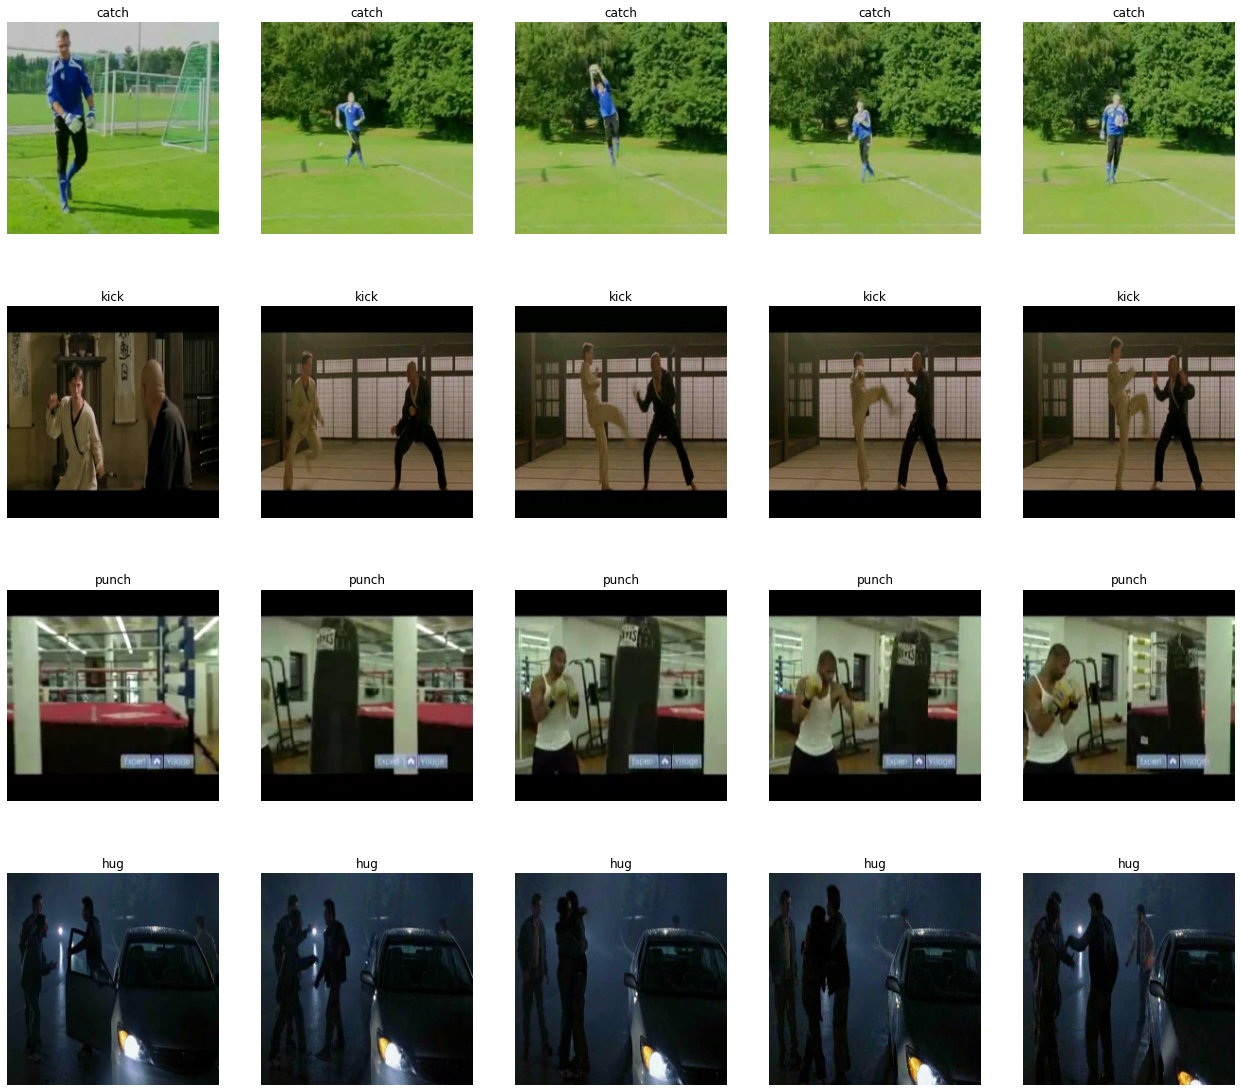

In [75]:
import keras_video.utils

#Now, we have some other helper functions we can use:
keras_video.utils.show_sample(train, random=True)

class cartwheel, validation count: 26, train count: 81
class catch, validation count: 25, train count: 77
class drink, validation count: 41, train count: 123
class hug, validation count: 29, train count: 89
class kick, validation count: 32, train count: 98
class kiss, validation count: 25, train count: 77
class punch, validation count: 31, train count: 95
class sit, validation count: 35, train count: 107
Total data: 8 classes for 747 files for train
Total data: 8 classes for 244 files for validation
Epoch 1/15
23/23 [==============================] - 79s 3s/step - loss: 1.0944 - categorical_accuracy: 0.1232 - val_loss: 1.0482 - val_categorical_accuracy: 0.1205
Epoch 2/15
23/23 [==============================] - 12s 533ms/step - loss: 1.0464 - categorical_accuracy: 0.1652 - val_loss: 1.0343 - val_categorical_accuracy: 0.2455
Epoch 3/15
23/23 [==============================] - 11s 467ms/step - loss: 1.0316 - categorical_accuracy: 0.2507 - val_loss: 1.0271 - val_categorical_accuracy: 0.25

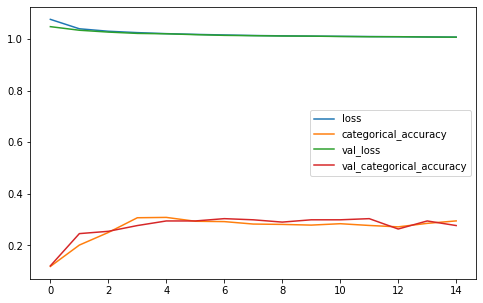

In [78]:
from matplotlib import pyplot as plt
import pandas as pd


#Now we can use our data just like we normally would, except now we have a new dimension: time!
#Here is an example of running this data through our old exampleNet.
#This is NOT a RNN, so it will simply take in a 5*224*224*3 input shape,
#with no information on the ordering of our inputs.

def exampleNet():
    m = keras.models.Sequential()
    m.add(keras.layers.Conv2D(filters=64,
                              kernel_size=(4,4),
                              activation="tanh",
                              input_shape=(5,224,224,3))) #Note the input shape here.
    m.add(keras.layers.GlobalAveragePooling3D()) #Note we have to change this to a 3D pooling, instead of 2d, as we now have another dimension.
    m.add(keras.layers.Dense(units=8)) #8 classes in our reduced HMDB dataset
    m.compile(optimizer=keras.optimizers.SGD(learning_rate=.001),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])
    
    return(m)


train = keras_video.VideoFrameGenerator(
    classes = classNames,
    glob_pattern = './HMDB/{classname}/*.avi',
    nb_frames = 5, 
    batch_size = 32, #I'm setting this higher for the actual run.  You may have to reduce.
    target_shape = (224,224),
    nb_channel = 3, 
    split_val = 0.25, 
    transformation = None, #I'm going to turn this off for this test - we're going to overfit anyway with such a small dataset. 
    use_frame_cache = True #You may have to turn this off - it requires a lot of memory to work, but speeds things up.
)

test = train.get_validation_generator()

#Note when we call this the first time, the first epoch will be slow
#as the frames are fenerated.  The "use_frame_cache" option is what keeps
#the frame in memory, and lets later epochs go MUCH faster.
#however, it does require a lot of memory! 

exampleNet = exampleNet()
modelHistory = exampleNet.fit(train, epochs=15, validation_data=test)

pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
plt.show()

class cartwheel, validation count: 26, train count: 81
class catch, validation count: 25, train count: 77
class drink, validation count: 41, train count: 123
class hug, validation count: 29, train count: 89
class kick, validation count: 32, train count: 98
class kiss, validation count: 25, train count: 77
class punch, validation count: 31, train count: 95
class sit, validation count: 35, train count: 107
Total data: 8 classes for 747 files for train
Total data: 8 classes for 244 files for validation
Epoch 1/60
31/31 [==============================] - 94s 3s/step - loss: 2.3764 - categorical_accuracy: 0.1256 - val_loss: 1.4530 - val_categorical_accuracy: 0.1250
Epoch 2/60
31/31 [==============================] - 19s 603ms/step - loss: 2.0923 - categorical_accuracy: 0.1563 - val_loss: 1.6154 - val_categorical_accuracy: 0.1042
Epoch 3/60
31/31 [==============================] - 20s 627ms/step - loss: 1.9513 - categorical_accuracy: 0.1693 - val_loss: 1.7865 - val_categorical_accuracy: 0.10

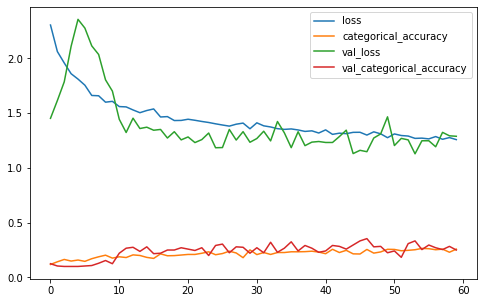

In [128]:
#Now, let's do the same thing, but with a RNN!

#First, we need to define the layer that we will be applied to every input image.
#I.e., each of our frames will pass into this layer before the RNN:
def convolutionalLayer():
    m = keras.Sequential()
    m.add(keras.layers.Conv2D(filters=64,
                              kernel_size=(4,4),
                              activation="tanh",
                              input_shape=(224,224,3)))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.GlobalMaxPool2D())    

    return(m)


def exampleRNN():
    
    m = keras.models.Sequential() 
    
    #The "TimeDistributed" layer here is what applies the convolutionaLayer we defined above to every frame.
    #Note the input shape starts with 10, or the number of frames we created for each video.
    m.add(keras.layers.TimeDistributed(convolutionalLayer(), input_shape=(10,224,224,3)))
    
    #Here, we implement a Simple RNN, which is a fully connected layer with a recurrent element.
    #The number of units you define here will define the number of inputs into the SimpleRNN during future
    #iterations. I.e., in this example, our RNN will have 1024 outputs (which are then used as inputs)
    #and a dropoout of 0.5 to support regularization.
    #https://keras.io/api/layers/recurrent_layers/simple_rnn/ 
    m.add(keras.layers.SimpleRNN(units=1024, dropout = 0.5)) 
    m.add(keras.layers.Dense(units=512))
    m.add(keras.layers.Dense(units=256))
    m.add(keras.layers.Dense(units=8)) #8 classes in our reduced HMDB dataset
    m.compile(optimizer=keras.optimizers.SGD(learning_rate=.001),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])
    
    return(m)

transforms = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)

train = keras_video.VideoFrameGenerator(
    classes = classNames,
    glob_pattern = './HMDB/{classname}/*.avi',
    nb_frames = 10, 
    batch_size = 24, 
    target_shape = (224,224),
    nb_channel = 3, 
    split_val = 0.25, 
    transformation = transforms,
    use_frame_cache = True #You may have to turn this off - it requires a lot of memory to work, but speeds things up.
)

test = train.get_validation_generator()

#Note we need more time to train our RNN, as we have added a large number of parameters that need to be fit.
modelHistory = exampleRNN().fit(train, epochs=60, validation_data=test)

pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
plt.show()